<a href="https://colab.research.google.com/github/hellojohnkim/mmai869/blob/main/2024_869_JohnKim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 869 2024: Individual Assignment

- Student Name: Kim, John
- Student Number: 20439250
- Section Number: MMAI 2024
- Favourite Book: Pachinko by Min Jin Lee
- Currently Reading: The Worlds I See by Fei Fei Li
- Submitted Date: 2024-01-06

In [22]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
print(datetime.datetime.now())

2024-01-06 15:10:36.078083


In [24]:
!which python

/Users/johnkim/anaconda3/bin/python


In [25]:
!python --version

Python 3.10.9


In [26]:
!echo $PYTHONPATH

# Question 1: Uncle Steve's Diamonds

## 1.0: Load data

In [27]:
# TODO: Import the packages
import sklearn
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

In [28]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [29]:
## Data Exploration
df1.describe().transpose()
list(df1)
df1.shape
df1.info()
df1.head(n=20)
df1.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [30]:
X = df1.copy()

In [31]:
# Pre-processing steps before clustering 
# use standard scaler to standardize the values in the data before we apply clsutering
scaler = StandardScaler()
features = df1.columns
X[features] = scaler.fit_transform(X[features])

In [32]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,Age,Income,SpendingScore,Savings
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463


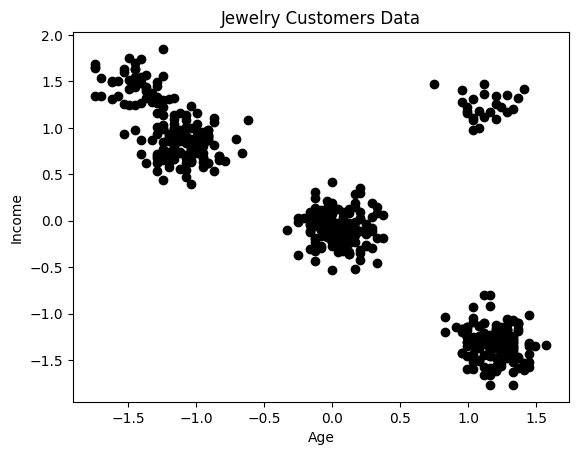

In [33]:
plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c="black");
plt.title("Jewelry Customers Data");
plt.xlabel('Age');
plt.ylabel('Income');
plt.xticks();
plt.yticks();

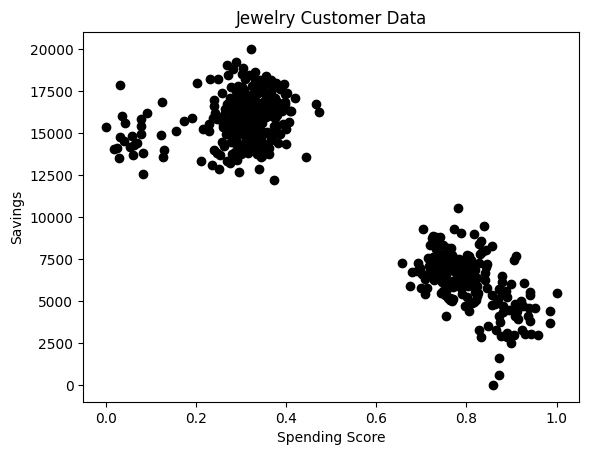

In [34]:
plt.figure();

plt.scatter(df1.iloc[:, 2], df1.iloc[:, 3], c="black");
plt.title("Jewelry Customer Data");
plt.xlabel('Spending Score');
plt.ylabel('Savings');
plt.xticks();
plt.yticks();

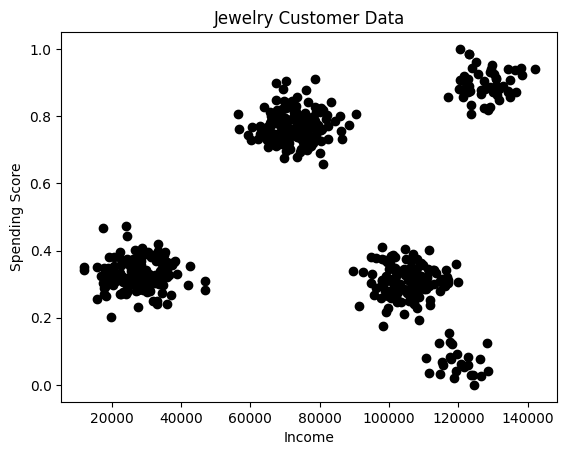

In [35]:
plt.figure();

plt.scatter(df1.iloc[:, 1], df1.iloc[:, 2], c="black");
plt.title("Jewelry Customer Data");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

## 1.1: Clustering Algorithm #1

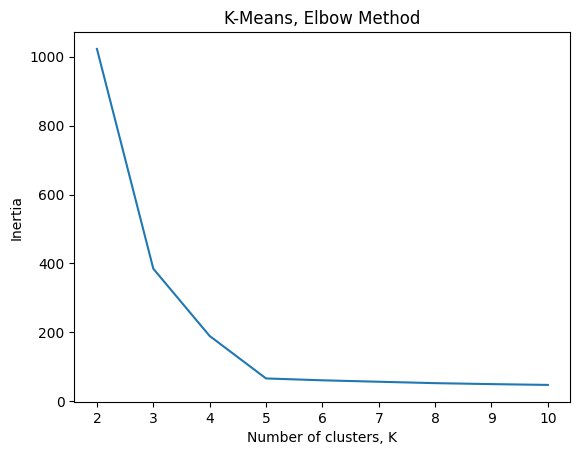

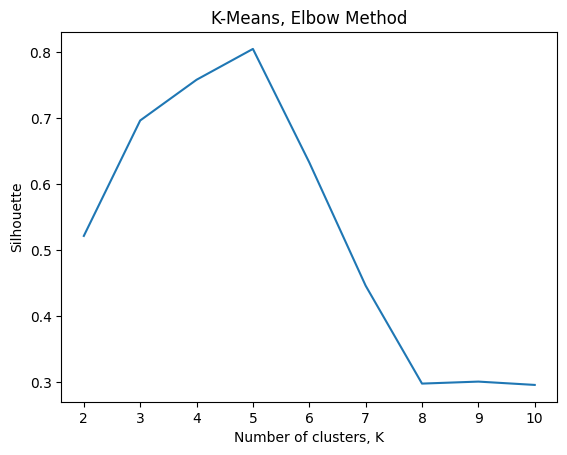

In [36]:
from sklearn.cluster import KMeans

# Using Elbow method to fid the number of clusters (k)

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init= 10).fit(X)
    inertias[k] = kmeans.inertia_  
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

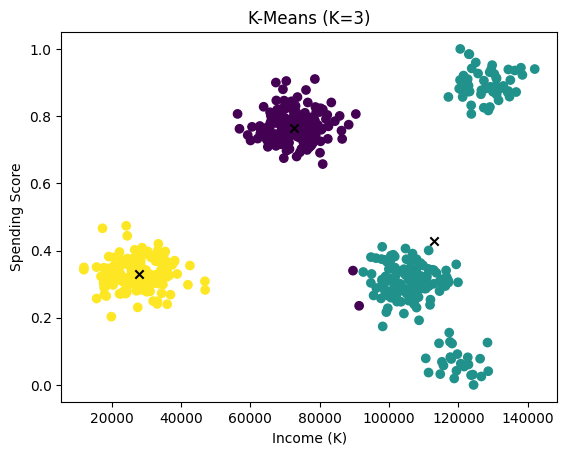

K=3, WCSS=43729705197.89, Sil=0.74


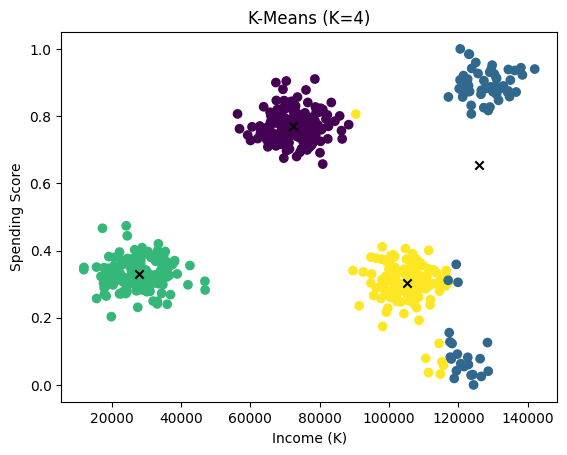

K=4, WCSS=21452909425.05, Sil=0.72


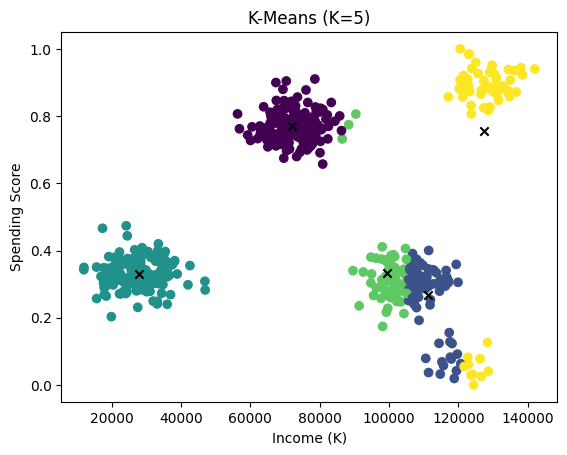

K=5, WCSS=17288079673.80, Sil=0.68


In [37]:
# Based on the above Elbow Method Result, we will use a K range between 3 to 5

def do_kmeans(df1, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(df1)

    plt.figure();
    plt.scatter(df1.iloc[:, 1], df1.iloc[:, 2], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()

    wcss = k_means.inertia_
    sil = silhouette_score(df1, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 6):
    do_kmeans(df1, k)

## 1.2: Clustering Algorithm #2

In [38]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [39]:
silhouette_score(X, agg.labels_)

0.8048976287755765

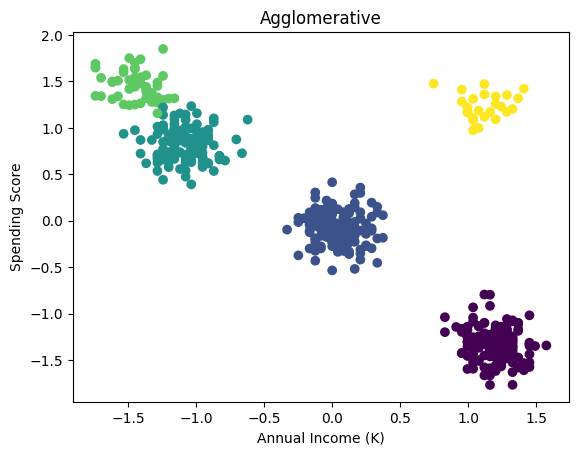

In [40]:
plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

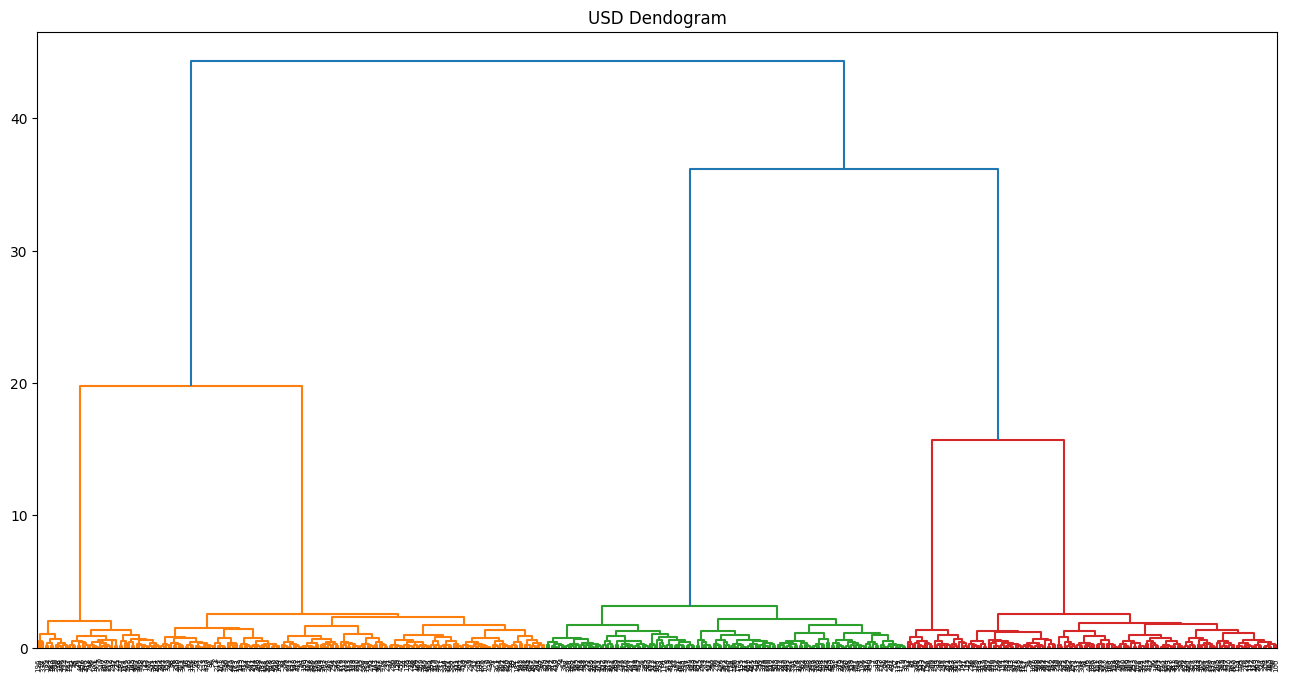

In [41]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("USD Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 

## 1.3 Model Comparison

K-Means Clustering had a silhouette score of 0.68, which is also indicative of a reasonably good cluster structure.
Hierarchical Clustering has a higher silhouette score of approximately 0.805, suggesting an even better cluster structure compared to K-means in this specific instance.

## 1.4 Personas

In [42]:
cluster_labels = agg.fit_predict(X)

# Add the cluster labels as a new column to your DataFrame
df1['ClusterID'] = cluster_labels

In [43]:
# Define aggregation dictionary function
agg_funcs = {
    'Age': ['min', 'mean', 'max'],
    'Income': ['min', 'mean', 'max', 'var'],
    'SpendingScore': ['min', 'mean', 'max', 'var'],
    'Savings': ['min', 'mean', 'max', 'var']
}

# Apply the aggregation functions to each cluster
cluster_stats = df1.groupby('ClusterID').agg(agg_funcs)

# Flatten the MultiIndex columns
cluster_stats.columns = ['_'.join(col) if type(col) is tuple else col for col in cluster_stats.columns.values]

# Reset the index to make 'ClusterID' a column
cluster_stats = cluster_stats.reset_index()

# Calculate the number of instances per cluster
instances_df = df1['ClusterID'].value_counts().sort_index().reset_index()
instances_df.columns = ['ClusterID', 'NumberOfInstances']

# Merge the number of instances with the cluster stats
cluster_stats = cluster_stats.merge(instances_df, on='ClusterID')

print(cluster_stats.to_string(index=False))

 ClusterID  Age_min  Age_mean  Age_max  Income_min   Income_mean  Income_max   Income_var  SpendingScore_min  SpendingScore_mean  SpendingScore_max  SpendingScore_var  Savings_min  Savings_mean  Savings_max  Savings_var  NumberOfInstances
         0       79 87.775510       97       12000  27866.102041       46977 4.158709e+07           0.203140            0.328800           0.473550           0.002045 13470.970605  16659.261445 20000.000000 1.401501e+06                147
         1       51 59.955414       68       56321  72448.063694       90422 3.894084e+07           0.657314            0.771518           0.910417           0.002121  4077.658657   6889.972190 10547.775368 1.107286e+06                157
         2       22 32.777778       44       89598 105265.809524      119877 3.697396e+07           0.174120            0.309926           0.411112           0.002071 12207.526078  14962.778066 17968.553929 1.127279e+06                126
         3       17 24.180000       31      

### Cluster 1: "Retired Savers"
- **Age Range**: Seniors (79-97 years old)
- **Age Mean**: 87
- **Income Level**: Lower income (12,000 - 46,977)
- **Spending Score**: Very low (0.20 - 0.47)
- **Savings**: High (13,470 - 20,000)
- **Size**: Largest segment (147 instances)
- Persona: This cluster represents retired individuals who are likely on a fixed income(pensions, etc) . They are conservative spenders with a significant amount of savings left untouched.

### Cluster 2: "Mid-Age Professionals"
- **Age Range**: Middle-aged (51-68 years old)
- **Age Mean**: 59
- **Income Level**: Middle to upper-middle income (56,321 - 90,422)
- **Spending Score**: High (0.65 - 0.91)
- **Savings**: Moderate (4,077 - 10,547)
- **Size**: Second largest segment (157 instances)
- Persona: This group consists of established professionals in the middle upper class income group. They have a high spending score, indicating a willingness to make significant purchases, balanced with a sensible amount of savings reflecting their age and income level.

### Cluster 3: "Young Affluents"
- **Age Range**: Young adults (22-44 years old)
- **Age Mean**: 32
- **Income Level**: High income (89,598 - 119,877)
- **Spending Score**: Moderate (0.17 - 0.41)
- **Savings**: Moderate to high (12,207 - 17,968)
- **Size**: Third largest segment (126 instances)
- Persona: This segment is likely composed of young and affluent professionals who earn a lot but are moderate in their spending. They may be focused on building wealth and investing in their future and families.

### Cluster 4: "Yolo Elites"
- **Age Range**: Young (17-31 years old)
-- **Age Mean**: 931
- **Income Level**: Very high income (117,108 - 142,000)
- **Age Mean**: 24
- **Spending Score**: Extremely high (0.80 - 1.00)
- **Savings**: Low (0 - 6,089)
- **Size**: Smaller segment (50 instances)
- Persona: The "Yolo Elite" are likely young professionals or entrepreneurs with very high incomes and the highest spending scores, indicating a lifestyle of luxury and high-end purchases. Their savings are low, suggesting a preference for enjoying the present rather than saving for the future.

### Cluster 5: "Senior Old Money"
- **Age Range**: Older seniors (77-93 years old)
- **Age Mean**: 86
- **Income Level**: Very high (110,582 - 128,596)
- **Spending Score**: Very low (0.00 - 0.15)
- **Savings**: High (12,554 - 17,833)
- **Size**: Smallest segment (25 instances)
- Persona: This small, exclusive group consists of older individuals with very high incomes but very low spending scores, which could be indicative of wealth accumulated over a lifetime. They have high savings, suggesting a frugal lifestyle despite their wealth.

# Question 2: Uncle Steve's Fine Foods

### 2.1 High Support & High Confidence

- **Rule**: `{bananas} -> {apples}`  
- The rule likely has high support and confidence, as these are two of the most commonly purchased fruits. This rule is not particularly interesting to Uncle Steve, as it's quite predictable that a significant portion of shoppers buy these popular fruits together. The insight offers little novelty or actionable strategy beyond what is already known.

### 2.2 High Support & Low Confidence

- **Rule**: `{sourdough bread} -> {organic olive oil}`  
- Sourdough or artisinal bread and organic olive oil may not always be purchased together frequently altough they are commonly paired together. This can perhaps be leveraged for cross-promotional strategies. Uncle Steve could introduce showcase these items together, possibly paired with tasting booths. This not only promotes the sale of both items but also enhances the customer's shopping experience by providing them with ideas for pairing and usage

### 2.3 Low Support & Low Confidence

- **Rule**: `{gluten-free pasta} -> {almond milk}`  
- The purchase of gluten-free pasta along with almond milk might occur infrequently and reflects a specific dietary preference for vegans, indicating a segment focused on specific health or dietary needs. Uncle Steve can use this insight to curate a section dedicated to special dietary requirements, featuring gluten-free, dairy-free, and other health-conscious products. This not only serves the needs of a particular customer group but also establishes the store as an inclusive and considerate shopping destination.

### 2.4 Low Support & High Confidence

- **Rule**: `{vegan cheese} -> {plant-based meat alternatives}`  
-  The correlation between purchasing vegan cheese and plant-based meat alternatives is indicative of a growing trend towards veganism. While the market segment for these products is specific and not widespread, those who buy one are likely to buy the other. Recognizing this, Uncle Steve could create a dedicated 'vegan corner' in his store, grouping all plant-based alternatives together. This not only makes it easier for vegan customers to shop but also introduces non-vegan customers to these alternatives.

# Question 3: Uncle Steve's Credit Union

## 3.0: Load data and split

In [15]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [16]:
X.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,3823,0,18,North Judithbury,Vacation,1983-08-08


## 3.1: Baseline model



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import datetime

# Convert 'DateOfBirth' Feature to Age
df3['Age'] = df3['DateOfBirth'].apply(lambda dob: datetime.datetime.now().year - pd.to_datetime(dob).year)

# Dropping features not helpful for the baseline model 
features_drop = ['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'DateOfBirth']
df3 = df3.drop(features_drop, axis=1)

# Encoding categorical features
label_encoder = LabelEncoder()
categorical_cols = df3.select_dtypes(include=['object']).columns
df3[categorical_cols] = df3[categorical_cols].apply(label_encoder.fit_transform)

# Re-splitting the data after transformations
X = df3.drop('BadCredit', axis=1)
y = df3['BadCredit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model with 5-fold cross valdidation
model = RandomForestClassifier(random_state=0)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score))

print("F1 Scores for each fold:", scores)
print("Mean F1 Score:", scores.mean())

F1 Scores for each fold: [0.63091483 0.52434457 0.63122924 0.62458472 0.604811  ]
Mean F1 Score: 0.6031768691677517


## 3.2: Adding feature engineering

In [18]:
from sklearn.preprocessing import StandardScaler

# Creating new features 
# more previous defaults, higher risk;  more accounts, less risk; longer stay, less risk
df3['Financial_Responsibility_Score'] = (df3['PreviousDefault'] * -2 + df3['PreviousAccounts'] * 1 + df3['ResidenceDuration'] * 1 + df3['Age'] * 0.5)
# lower credit ratio may mean better financial management, therefore less risky
df3['Credit_Utilization_Ratio'] = df3['Amount'] / (df3['PreviousAccounts'] + 1)
# assuming age correlates with stability and longer residence means stable employment
df3['Employment_Stability_Score'] = (df3['Age'] * 0.5) + (df3['ResidenceDuration'] * 0.5)

# Split the data into features and target again after adding new features
X = df3.drop('BadCredit', axis=1)
y = df3['BadCredit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retraining the model with modified data
model.fit(X_train_scaled, y_train)
f1_score_with_feature_engineering = f1_score(y_test, model.predict(X_test_scaled))

print("F1 Score with Feature Engineering:", f1_score_with_feature_engineering)


F1 Score with Feature Engineering: 0.6391184573002755


This improvement indicates that the new features (like Financial Responsibility Score, Credit Utilization Ratio, and Employment Stability Score) added valuable information, leading to better model performance.

## 3.3: Adding feature selection

In [19]:
from sklearn.feature_selection import SelectFromModel

# Using RandomForestClassifier for feature selection
model.fit(X_train_scaled, y_train)
selector = SelectFromModel(model, threshold='mean')

# Transforming the training and test sets
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Retraining the model with selected features
model_selected = RandomForestClassifier(random_state=0)
scores_with_selected_features = cross_val_score(model_selected, X_train_selected, y_train, cv=5, scoring=make_scorer(f1_score))
mean_score_with_selected_features = scores_with_selected_features.mean()

selected_features = X.columns[selector.get_support()]

print("Mean F1 Score with Selected Features:", mean_score_with_selected_features)
print("Selected Features:", selected_features)

Mean F1 Score with Selected Features: 0.5847364317218041
Selected Features: Index(['Amount', 'Age', 'Financial_Responsibility_Score',
       'Credit_Utilization_Ratio', 'Employment_Stability_Score'],
      dtype='object')


Interestingly, the performance dropped compared to the feature-engineered model and the selected features included all 3 engineered features. This suggests that some of the features dropped during selection were actually informative, or that the model could benefit from a different feature selection strategy by changing the threshold or another method.

## 3.4: Adding hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.5947354589652166


The hyperparameter tuning provided a better F1 score than the feature selection model, but still, it's lower than the feature-engineered model. It's possible that the parameter space explored in grid search wasn't optimal, or that the model is more sensitive to the features

## 3.5: Performance estimation on testing data

In [21]:
# Use the best estimator from the grid search
best_model = grid_search.best_estimator_

# Fit the best model on the entire training set and evaluate on the test set
best_model.fit(X_train_selected, y_train)
final_f1_score = f1_score(y_test, best_model.predict(X_test_selected))

print("Final F1 Score on Test Data:", final_f1_score)


Final F1 Score on Test Data: 0.6153846153846154


It's higher than the baseline and feature selection models but lower than the feature-engineered model.
This suggest that the Feature Selection might needs a revisit - such as alternative methods or thresholds for feature selection, or experimenting with including more features. Different weights also need to be further explored for the custom engnineered features. Final Model's Performance is consistent but not superior to the feature engineering step. Revising the combination of features and hyperparameters, or consider more advanced modeling techniques or algorithms will be required.

# Question 4: Uncle Steve's Wind Farm

**Current Situtation**
- 256 Failed Turbines
- Failure Repair Cost: $20,000 per turbine
- Mainteance Service Cost: $2,000 per turbine
- Inspection CostL $500 per turbine

Uncle Steve is currently paying $5.12 million in maintenance costs without any predictive mainteance models,

- number of fails * failure repair cost per turbine = 256 turbines * $20,000 = $5,120,000

Random Forest Model will save $3,492,500 for Uncle Steve and cost less than RNN Model.

Additional metrics like


|         | Cost           |Savings   |
| ------------- |:------------:|:------------:
| No Predictive Models| $5,120,000 |  -    |
| **Random Forest** | $1,627,500 | $3,492,500 |
| Recurrent Neural Network| $1,765,000 | $3,355,000 |


**Random Forest Cost Analysis**

Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |Subtotal |
| ------------- |:------------:| :-----:|:-----:|
| **Actual Fail**      | 201 | 55 |256|
| **Actual No Fail**   | 50 | 255,195 |255,245|
| Subtotal                    | 251|255,250|255,501|

Cost matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |:------------:| :-----:|
| **Actual Fail**      | $2500 | $20,000 |
| **Actual No Fail**   | $500 | - |

Total Cost for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |:------------:| :-----:|
| **Actual Fail**      | $502,500 | $1,100,000 |
| **Actual No Fail**   | $25,000 | - |

Total Cost for Random Forest = $502,500 + $25,000 + $1,100,000 =  $1,627,500

**RNN Cost Analysis**

Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |Subtotal |
| ------------- |:------------:| :-----:|:-----:|
| **Actual Fail**      | 226 | 30 |256|
| **Actual No Fail**   | 1200 | 25,4045 | 254,245|
| Subtotal                   | 1426 | 254,075| 255,501|

Cost matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |:------------:| :-----:|
| **Actual Fail**      | $2500 | $20,000 |
| **Actual No Fail**   | $500 | - |

Total Cost for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |:------------:| :-----:|
| **Actual Fail**      |  $565,000  | $600,000  |
| **Actual No Fail**   |  $600,000  | - |

Total Cost for RNN = $565,000 + $600,000 + $600,000 = $1,765,000